In [ ]:
## for data
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
'''
Читаем данные из файла, и сразу смотрим заголовки столбцов (название фич) и первые 5 строк.

'''
dtf = pd.read_csv('/content/drive/My Drive/DataSet/secondary_data.csv', sep=';')
dtf.head()


,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [ ]:
'''
Определяет, является ли столбец числовым или категориальным.
:параметр
     :param dtf: dataframe - входные данные
     :param col:str - имя столбца для анализа
     :param max_cat: num — максимальное количество уникальных значений для распознавания столбца как категориального
:возвращает
     "cat", если столбец является категориальным или "num" в противном случае


Recognize whether a column is numerical or categorical.
:parameter
    :param dtf: dataframe - input data
    :param col: str - name of the column to analyze
    :param max_cat: num - max number of unique values to recognize a column as categorical
:return
    "cat" if the column is categorical or "num" otherwise
'''
def utils_recognize_type(dtf, col, max_cat=20):
    if (dtf[col].dtype == "O") | (dtf[col].nunique() < max_cat):
        return "cat"
    else:
        return "num"

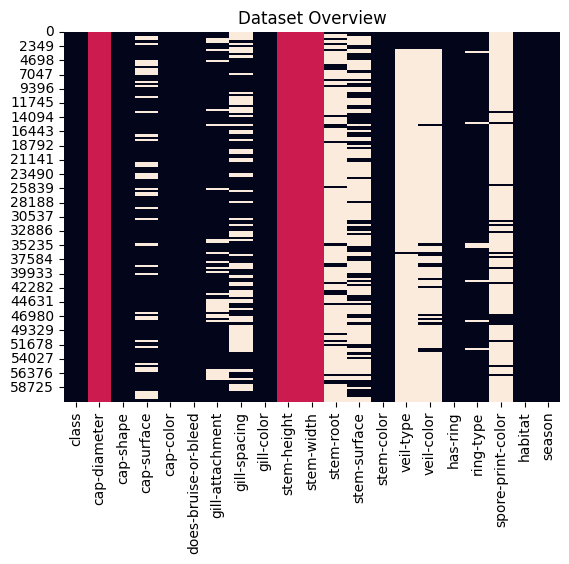

In [ ]:
'''
формируем словарь dic_cols.
Ключи - название фич
Значение - категориальный (cat) или числовой (num)
'''
dic_cols = {col:utils_recognize_type(dtf, col, max_cat=20) for col in dtf.columns}

'''
dtf.isnull() - возвращает датасет, который похож на изначальный датасет dtf, но в каждой ячейке вместо значений написано:
 False (если значение есть)
 True  (если в ячейке отсутствует значение)
'''
heatmap = dtf.isnull()

'''
А дальше проходим по столбцам, и меняем значения:
 если столбец числовой:
    пишем 0.5, если значение False (то есть оно не нулевое)
    пишем 1,   если значение True

 если столбец категориальный
    пишем 0, если значение False   (то есть оно не нулевое)
    пишем 1,   если значение True

После этого у нас окажется, что значения могут принимать всего три различных значения.
'''
for k,v in dic_cols.items():
    if v == "num":
        heatmap[k] = heatmap[k].apply(lambda x: 0.5 if x is False else 1)
    else:
        heatmap[k] = heatmap[k].apply(lambda x: 0 if x is False else 1)

'''
Строим heatmap (тепловую карту)
0.5 - если значение есть и оно числовое
0   - если значение есть и оно категориальное
1   - если значения в ячейке нет
'''
sns.heatmap(heatmap, cbar=False).set_title('Dataset Overview')

plt.show()

'''
Печатаем внизу подобие легенды, раскрашивая так, как нужно.
'''
print("\033[1;37;40m Categerocial ", "\033[1;30;41m Numeric ", "\033[1;30;47m NaN ")

In [ ]:
dtf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

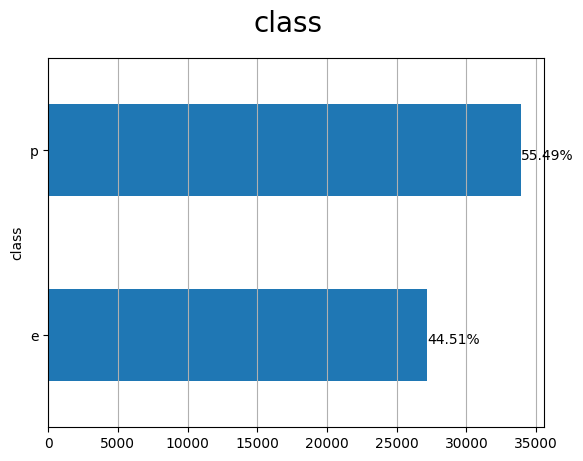

In [ ]:

# Задаем название столбца, по которому будем группировать
y = 'class'

# Считаем количество объектов с одинаковыми значениями в столбце y
ax = dtf[y].value_counts().sort_values().plot(kind="barh")

# Формируем надписи для графика
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width() + 0.3, i.get_y() + 0.20,
            str(round((i.get_width() / total) * 100, 2)) + '%',
            fontsize=10, color='black')

ax.grid(axis="x")
plt.suptitle(y, fontsize=20)

# Отрисовываем график
plt.show()


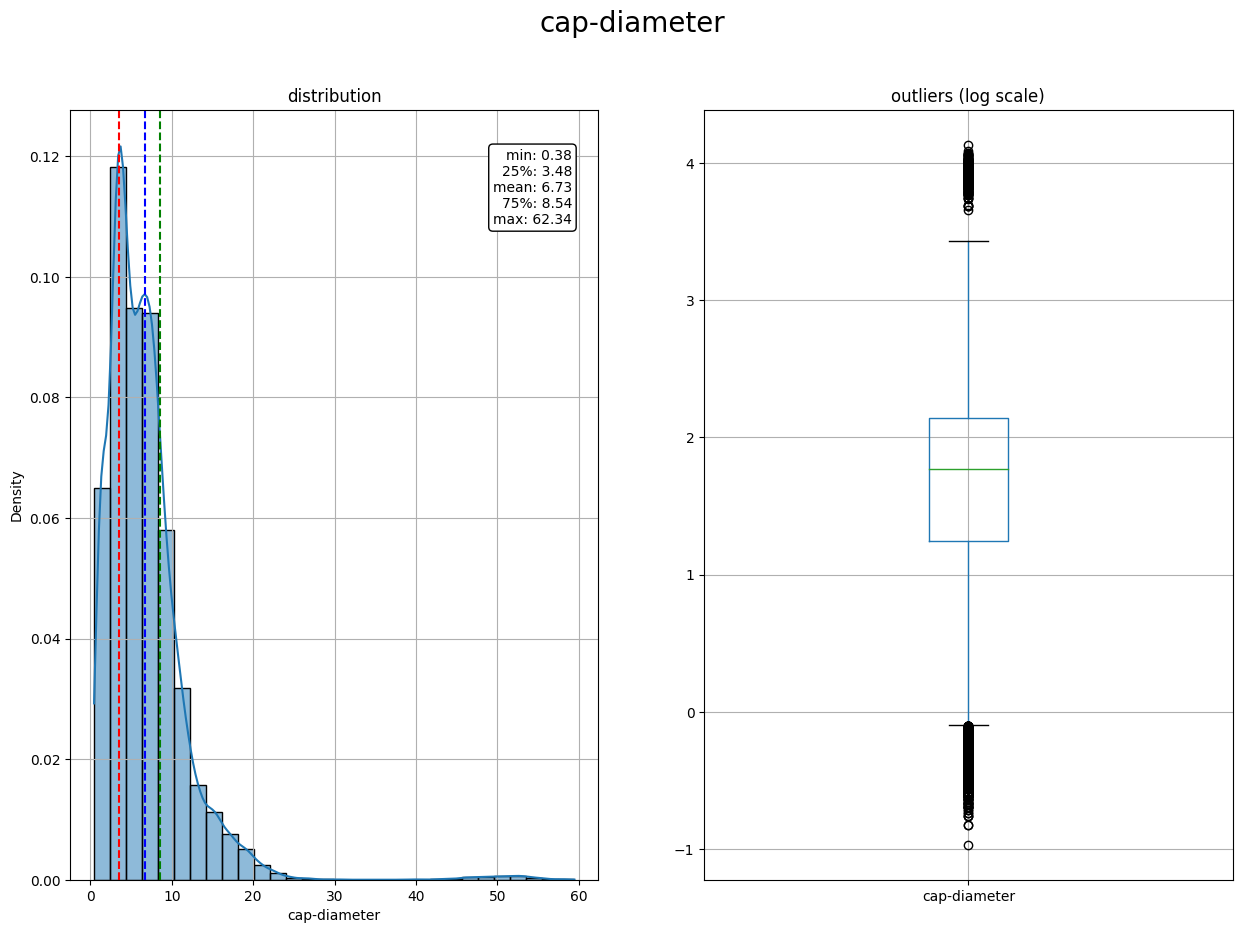

In [ ]:
x = "cap-diameter"

# Создаем фигуру и оси
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(15, 10))
fig.suptitle(x, fontsize=20)

# Распределение
ax[0].title.set_text('distribution')
variable = dtf[x].fillna(dtf[x].mean())  # Замена отсутствующих значений
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))  # Вычисляем квантиль
variable = variable[(variable > breaks[0]) & (variable < breaks[10])]
sns.histplot(variable, kde=True, ax=ax[0], stat="density", bins=30)  # Построение гистограммы
des = dtf[x].describe()
ax[0].axvline(des["25%"], ls='--', color='red')
ax[0].axvline(des["mean"], ls='--', color='blue')
ax[0].axvline(des["75%"], ls='--', color='green')
ax[0].grid(True)

# Формируем текстовое поле с описательной статистикой
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: " + des["min"], "25%: " + des["25%"], "mean: " + des["mean"],
                 "75%: " + des["75%"], "max: " + des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10,
           va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))

# Выбросы
ax[1].title.set_text('outliers (log scale)')
tmp_dtf = pd.DataFrame(dtf[x])
tmp_dtf[x] = np.log(tmp_dtf[x].replace(0, np.nan))  # Замена 0 на NaN для логарифма
tmp_dtf.boxplot(column=x, ax=ax[1])

# Отрисовываем
plt.show()


1. Гистограмма распределения

Гистограмма показывает асимметричное правостороннее распределение (скошенность вправо). Это означает, что большинство грибов имеет небольшой диаметр шляпы (ближе к нулю), с некоторым меньшинством грибов, имеющих значительно больший размер.

Диаметр шляп грибов в основном находится в диапазоне от 0.38 см до 10 см, но также есть некоторые значительно большие значения, которые могут указывать на экзотические или редкие виды.

2. Boxplot

Квартильные значения:

* Минимум: Самая маленькая величина (не выброс), визуально подтверждена на boxplot.

* Верхняя и нижняя границы ящика показывают межквартильный диапазон — значения от 3.48 см до 8.54 см, что говорит о том, что много грибов находится в этом диапазоне.

* Медиана: Отображается как горизонтальная зеленая линия внутри ящика (на данном боксплоте медиана не указана, но она, вероятнее всего, будет расположена ближе к 6.73 см).

На boxplot видно множество выбросов выше верхней границы (Q3 + 1.5 * IQR), которые подтверждают, что некоторые грибы значительно превышают средний размер. Это может означать наличие редких видов.


In [ ]:
def show_dist(x, dtf):
    # Создаем фигуру и оси
    fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(15, 10))
    fig.suptitle(x, fontsize=20)

    # Распределение
    ax[0].title.set_text('distribution')
    variable = dtf[x].fillna(dtf[x].mean())  # Замена отсутствующих значений
    breaks = np.quantile(variable, q=np.linspace(0, 1, 11))  # Вычисляем квантиль
    variable = variable[(variable > breaks[0]) & (variable < breaks[10])]
    sns.histplot(variable, kde=True, ax=ax[0], stat="density", bins=30)  # Построение гистограммы
    des = dtf[x].describe()
    ax[0].axvline(des["25%"], ls='--', color='red')
    ax[0].axvline(des["mean"], ls='--', color='blue')
    ax[0].axvline(des["75%"], ls='--', color='green')
    ax[0].grid(True)

    # Формируем текстовое поле с описательной статистикой
    des = round(des, 2).apply(lambda x: str(x))
    box = '\n'.join(("min: " + des["min"], "25%: " + des["25%"], "mean: " + des["mean"],
                    "75%: " + des["75%"], "max: " + des["max"]))
    ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10,
              va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))

    # Выбросы
    ax[1].title.set_text('outliers (log scale)')
    tmp_dtf = pd.DataFrame(dtf[x])
    tmp_dtf[x] = np.log(tmp_dtf[x].replace(0, np.nan))  # Замена 0 на NaN для логарифма
    tmp_dtf.boxplot(column=x, ax=ax[1])

    # Отрисовываем
    plt.show()



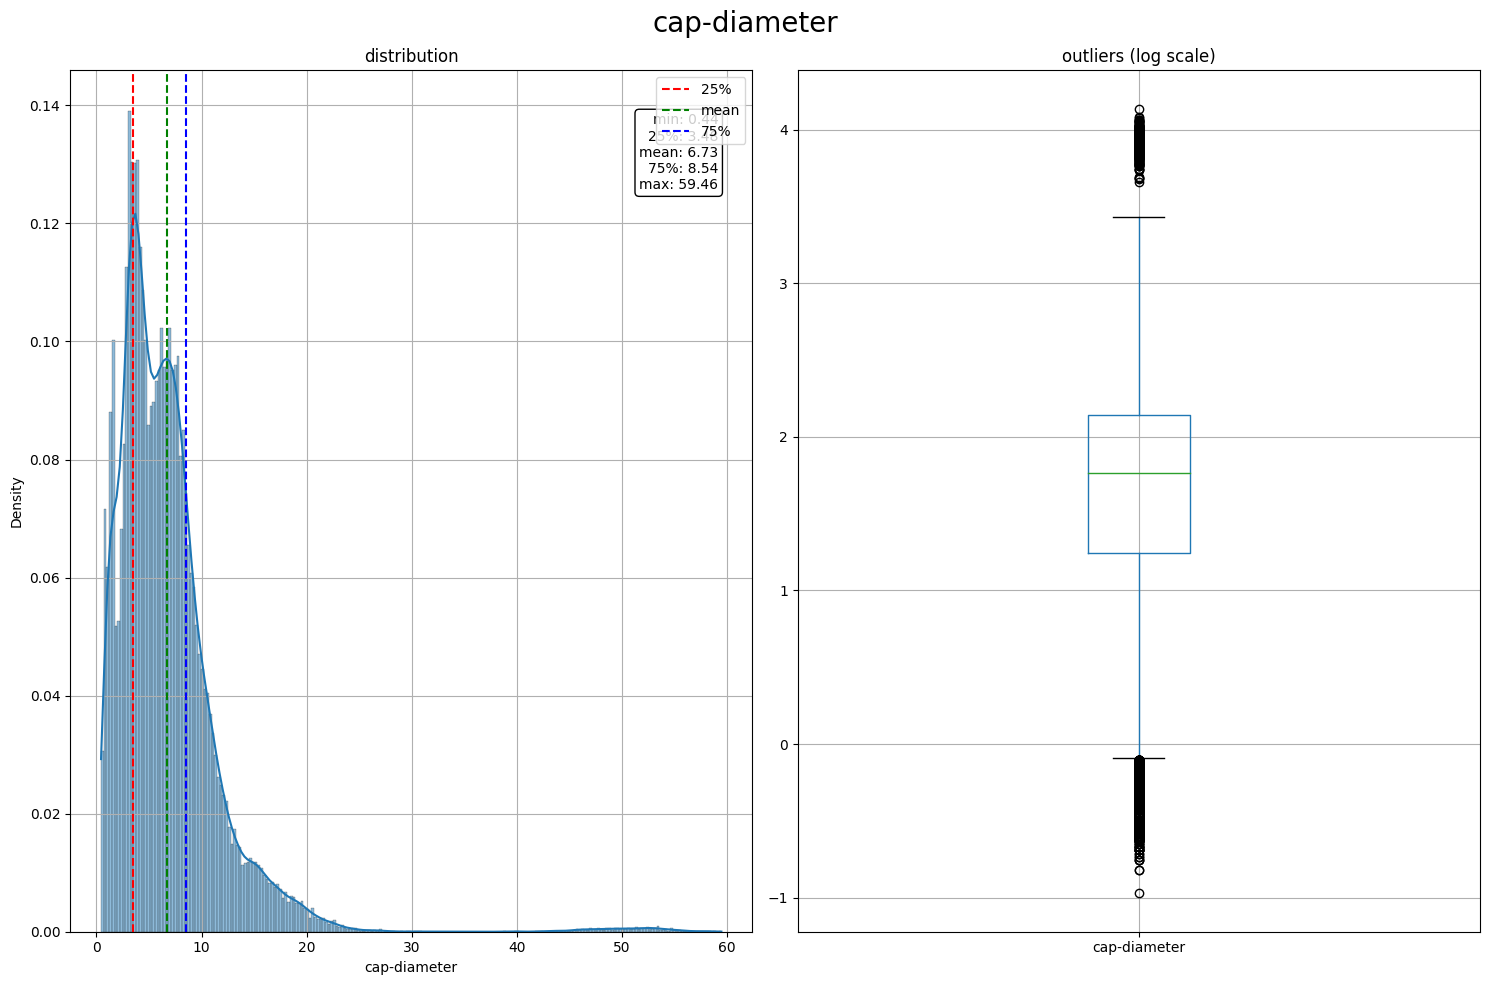

In [ ]:
column_name = 'cap-diameter'  # Замените на правильное имя столбца из вашего датасета

try:
    show_dist(column_name, dtf)
except ValueError as e:
    print(f"Ошибка: {e}")


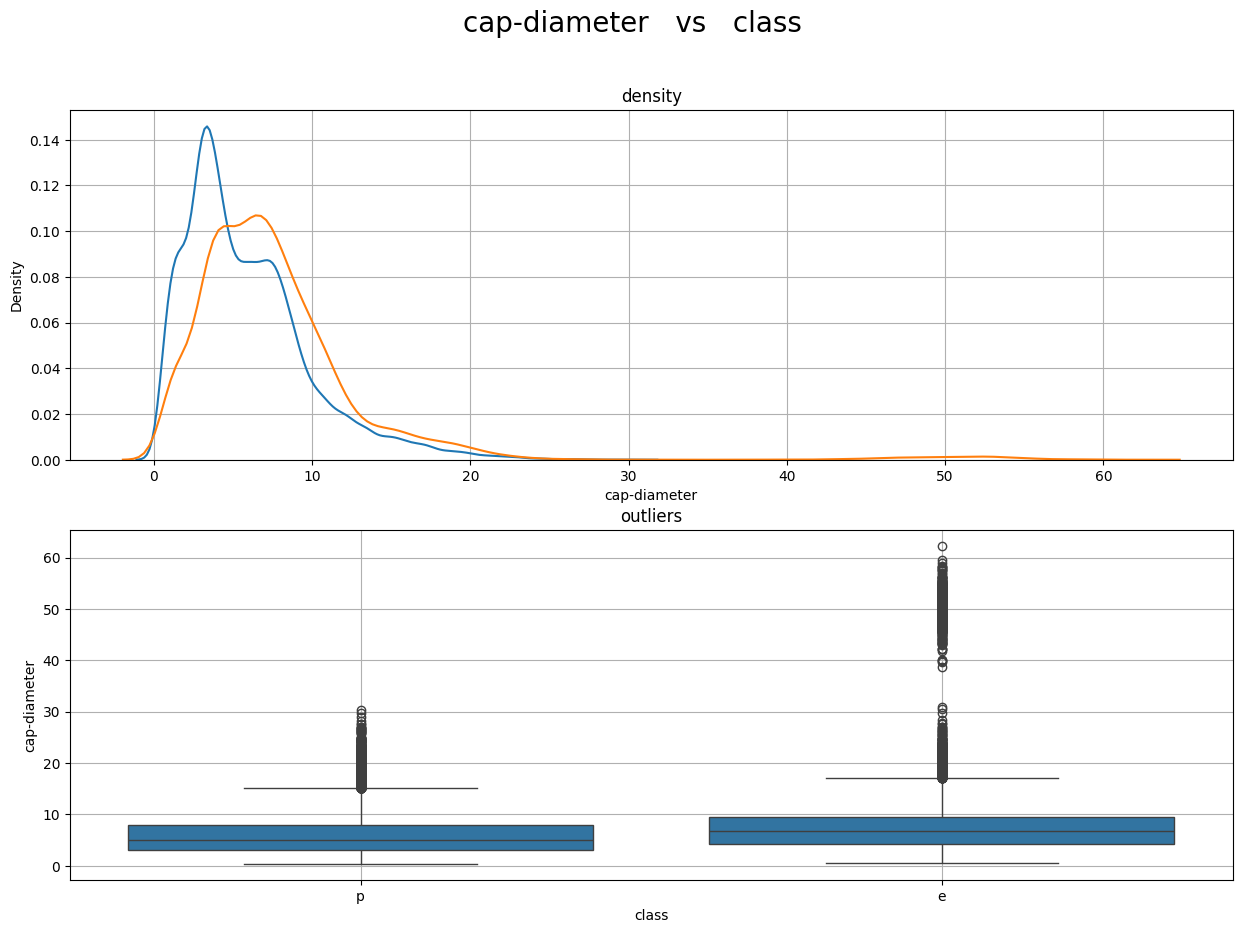

In [ ]:
'''
Для того, чтобы понять, обладает ли  "cap-diameter" предсказательной силой для предсказания"class", построим график плотности распределений и усиковую диаграмму cap-diameter  для каждого уникального class.

'''

cat, num = "class", "cap-diameter"
fig, ax = plt.subplots(nrows=2, ncols=1,  sharex=False, sharey=False, figsize=(15, 10))# распаковываем  кортеж в переменные figи ax.
fig.suptitle(x+"   vs   "+y, fontsize=20)# получаем объект рисунка и массив подграфиков,где первое число - количество строк,второе - столбцов, sharex, sharey задают нужно ли разделять ось между подграфиками
'''
Пропишем распределение:
'''

### distribution
ax[0].title.set_text('density')
for i in dtf[cat].unique():  # перебираем все уникальные значения в столбце dtf[cat], cat="class"
    sns.kdeplot(dtf[dtf[cat]==i][num],   label=i, ax=ax[0])#Построим график плотности распределения в столбце num, при условии, что значение в столбце dtf[cat] совпадет с i
ax[0].grid(True)#Настроим линии сетки.

### boxplot
ax[1].title.set_text('outliers')#устанавливаем заголовок
sns.boxplot(x=cat, y=num, data=dtf, ax=ax[1])#Нарисуем блочную диаграмму, чтобы показать распределения по категориям.


ax[1].grid(True)#Настроим линии сетки.
'''
  Отрисовываем
'''

plt.show()

1. График плотности распределения (Density Plot)

 По оси X отложено значение cap-diameter, а по оси Y — плотность вероятности.

* Класс "p" (кривая синего цвета) имеет более высокую плотность в диапазоне от 0 до 10, с пиком около 5 и 7, что указывает на то, что это значение капсулы чаще встречается в этом классе.
* Класс "e" (кривая оранжевого цвета) имеет более широкий разброс значений и, кажется, немного смещён к большему значению, с более низкой плотностью в том же диапазоне, где класс "p" обладает высокими значениями.
2. Box Plot

 Ящики показывают межквартильный диапазон (IQR), а линия внутри ящика обозначает медиану.
* Класс "p":
Ящик для класса "p" расположен преимущественно от 0 до 10, с несколькими выбросами (точки выше 20).
Разброс значений ниже 10 кажется небольшим, что говорит о стабильности и предсказуемости этого класса.
* Класс "e":
Ящик для класса "e" имеет большее значение, со значениями, колеблющимися от 0 до 40.
Обнаруживаются выбросы, указывающие на наличие значений cap-diameter, превышающих 30.
Это означает, что класс "e" показывает более широкий диапазон значений, что может привести к большей неоднородности внутри класса.
#### Заключение

 Такие различия в распределениях и присутствие выбросов предполагают, что cap-diameter может быть информативным признаком для предсказания класса.


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Словарь для хранения LabelEncoders
label_encoders = {}
n = 1

# Замена NaN на 0 и других значений на 1+ с использованием LabelEncoder
for column in dtf.columns:
    if dtf[column].dtype == 'object':  # Проверяем, является ли столбец категориальным (строковым)
        # Замена NaN на специальное значение, например, "NaN" для корректной работы LabelEncoder
        has_nan = dtf[column].isnull().any()
        dtf[column] = dtf[column].fillna('NaN')

        # Инициализируем LabelEncoder и применяем его к столбцу
        le = LabelEncoder()
        dtf[column] = le.fit_transform(dtf[column])

        # Если в столбце не было NaN изначально, смещаем все значения на 1
        if not has_nan:
            dtf[column] += 1

        # Сохраняем LabelEncoder для обратного преобразования (если потребуется)
        label_encoders[column] = le

        # Вывод информации о заменах
        print(f"{n}. Заменены значения в столбце '{column}':")
        n += 1
        unique_classes = le.classes_
        for idx, original_value in enumerate(unique_classes):
            adjusted_idx = idx + 1 if not has_nan else idx
            print(f"  '{original_value}' на {adjusted_idx}")

1. Заменены значения в столбце 'class':
  'e' на 1
  'p' на 2
2. Заменены значения в столбце 'cap-shape':
  'b' на 1
  'c' на 2
  'f' на 3
  'o' на 4
  'p' на 5
  's' на 6
  'x' на 7
3. Заменены значения в столбце 'cap-surface':
  'NaN' на 0
  'd' на 1
  'e' на 2
  'g' на 3
  'h' на 4
  'i' на 5
  'k' на 6
  'l' на 7
  's' на 8
  't' на 9
  'w' на 10
  'y' на 11
4. Заменены значения в столбце 'cap-color':
  'b' на 1
  'e' на 2
  'g' на 3
  'k' на 4
  'l' на 5
  'n' на 6
  'o' на 7
  'p' на 8
  'r' на 9
  'u' на 10
  'w' на 11
  'y' на 12
5. Заменены значения в столбце 'does-bruise-or-bleed':
  'f' на 1
  't' на 2
6. Заменены значения в столбце 'gill-attachment':
  'NaN' на 0
  'a' на 1
  'd' на 2
  'e' на 3
  'f' на 4
  'p' на 5
  's' на 6
  'x' на 7
7. Заменены значения в столбце 'gill-spacing':
  'NaN' на 0
  'c' на 1
  'd' на 2
  'f' на 3
8. Заменены значения в столбце 'gill-color':
  'b' на 1
  'e' на 2
  'f' на 3
  'g' на 4
  'k' на 5
  'n' на 6
  'o' на 7
  'p' на 8
  'r' на 9
  

In [ ]:
'''
    При разделении данных на обучающие и тестовые наборы вы должны следовать одному основному правилу:
        строки в обучающем наборе не должны также появляться в тестовом наборе.
        Это потому, что модель видит целевые значения во время обучения и использует их для понимания явления.
        Другими словами, модель уже знает правильный ответ для обучающих наблюдений (.
'''

# Split data, 70% - тренировочная выборка, 30% тестовая выборка
dtf_train, dtf_test = train_test_split(dtf, test_size=0.3, random_state=42)

# Вывод информации
print("X_train shape:", dtf_train.drop("class", axis=1).shape,
      "| X_test shape:", dtf_test.drop("class", axis=1).shape)

print("Unique classes in y_train:", dtf_train["class"].unique())
print("Unique classes in y_test:", dtf_test["class"].unique())

print(dtf_train.drop("class", axis=1).shape[1], "features:", dtf_train.drop("class", axis=1).columns.to_list())

X_train shape: (42748, 20) | X_test shape: (18321, 20)
Unique classes in y_train: [1 2]
Unique classes in y_test: [1 2]
20 features: ['cap-diameter', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color', 'habitat', 'season']


В тренировочном наборе данных 42 748 образцов и 20 признаков.

Для тестового набора - 18 321 образец с тоже 20 признаками.

In [ ]:
# смотрим размер полученной выборки трейне.. 21 столбцов, 42748 строк
dtf_train.shape

(42748, 21)

In [ ]:
# формируем вспомогательный датасет (где все нужные фичи(столбцы), и нет целевой переменной) и series с целевой переменной. Для трейна
train_x = dtf_train[['cap-diameter', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color', 'habitat', 'season']]
train_y = dtf_train['class']

In [ ]:
# формируем вспомогательный датасет (где все нужные фичи(столбцы), и нет целевой переменной) и series с целевой переменной. Для теста

test_x = dtf_test[['cap-diameter', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color', 'habitat', 'season']]
test_y = dtf_test['class']

In [ ]:
from sklearn.preprocessing import StandardScaler

# Инициализация StandardScaler
scaler = StandardScaler()

# Выбор числовых колонок для нормализации
numerical_cols = ['cap-diameter', 'stem-height', 'stem-width']

# Нормализация тренировочного набора
train_x[numerical_cols] = scaler.fit_transform(train_x[numerical_cols])

# Нормализация тестового набора с использованием параметров, полученных из тренировочного набора
test_x[numerical_cols] = scaler.transform(test_x[numerical_cols])


<ipython-input-53-0d75c5539299>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_x[numerical_cols] = scaler.fit_transform(train_x[numerical_cols])
<ipython-input-53-0d75c5539299>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x[numerical_cols] = scaler.transform(test_x[numerical_cols])


In [ ]:
train_x.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
60500,-0.267047,2,0,3,1,4,3,3,-0.037636,1.053230,0,0,7,0,0,1,2,0,4,2
932,1.156232,7,0,3,1,3,0,11,1.242168,0.203859,0,0,12,1,5,2,1,0,1,1
28092,0.185551,6,9,9,2,2,0,11,-0.589533,0.075858,0,7,7,0,0,1,2,0,1,3
37517,-0.867945,5,9,6,1,1,1,4,0.108542,-0.973949,0,7,13,0,0,2,1,0,5,1
26695,0.378147,3,0,12,1,7,1,12,-0.106250,-0.192051,0,0,12,0,0,1,2,0,1,3


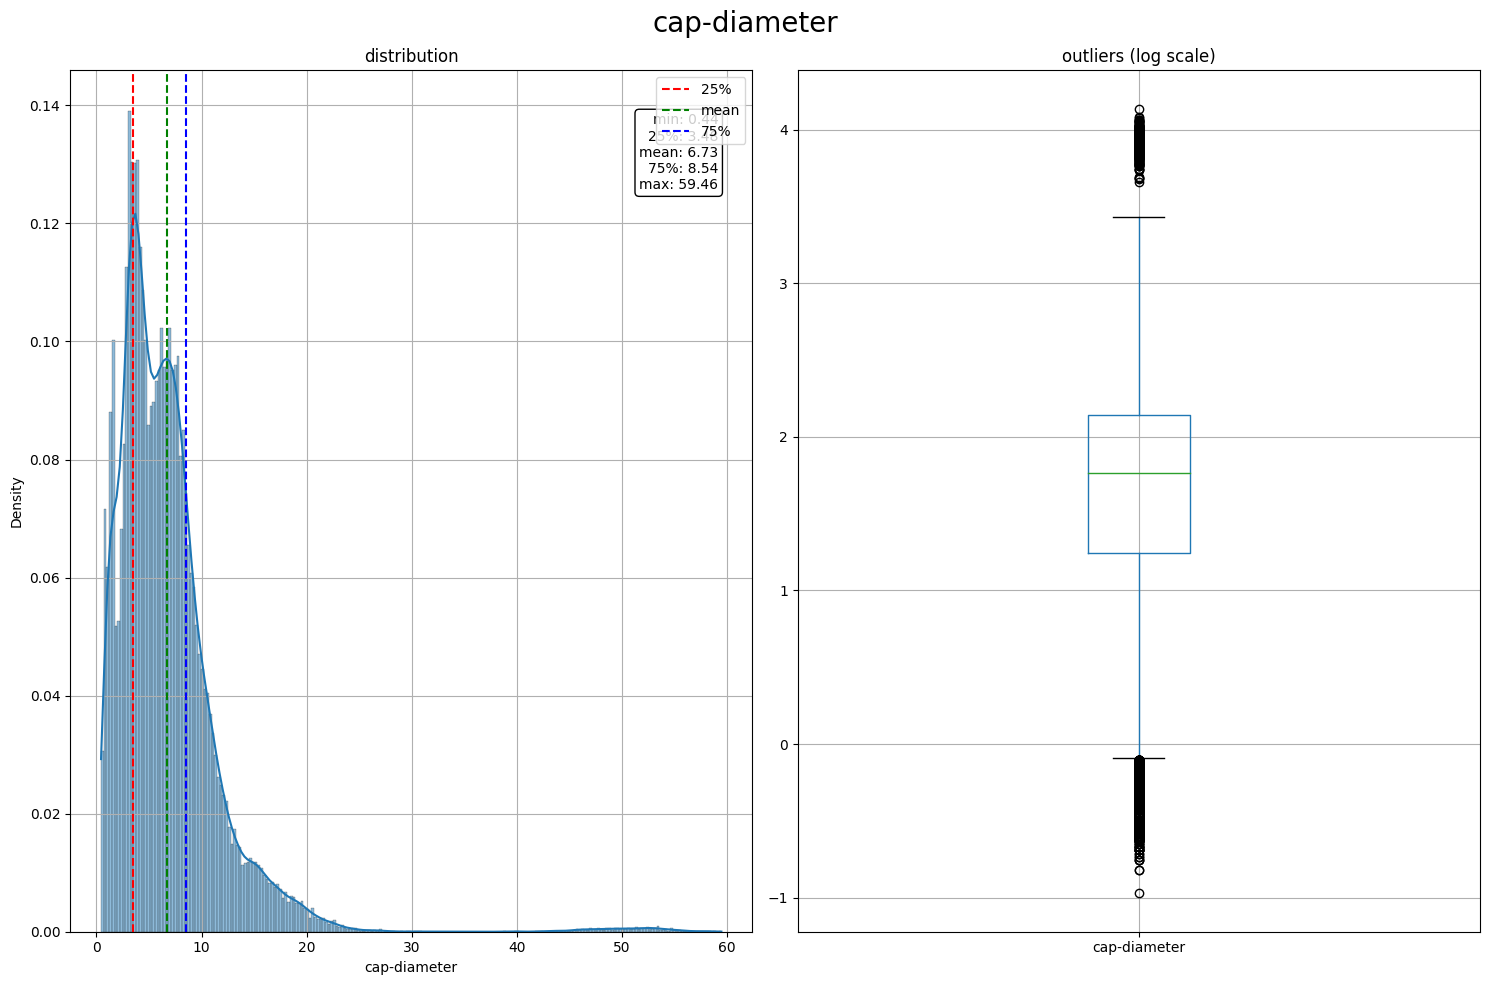

In [ ]:
show_dist('cap-diameter', dtf) #используем ранее созданную нами функцию для отрисовки графиков

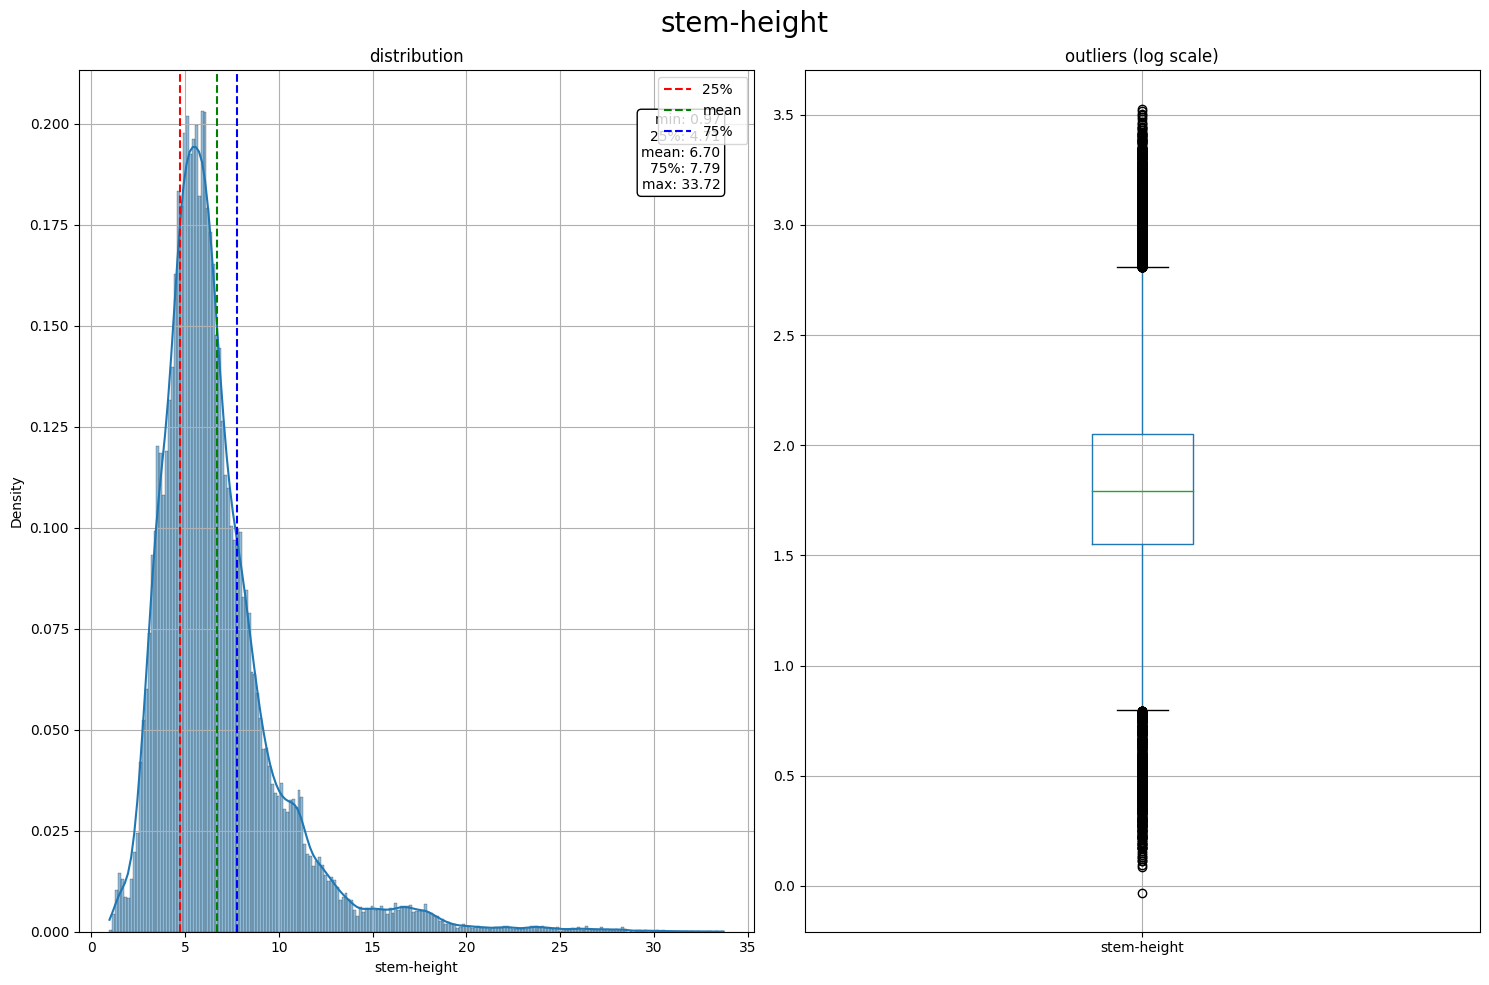

In [ ]:
show_dist('stem-height', dtf) #используем ранее созданную нами функцию для отрисовки графиков

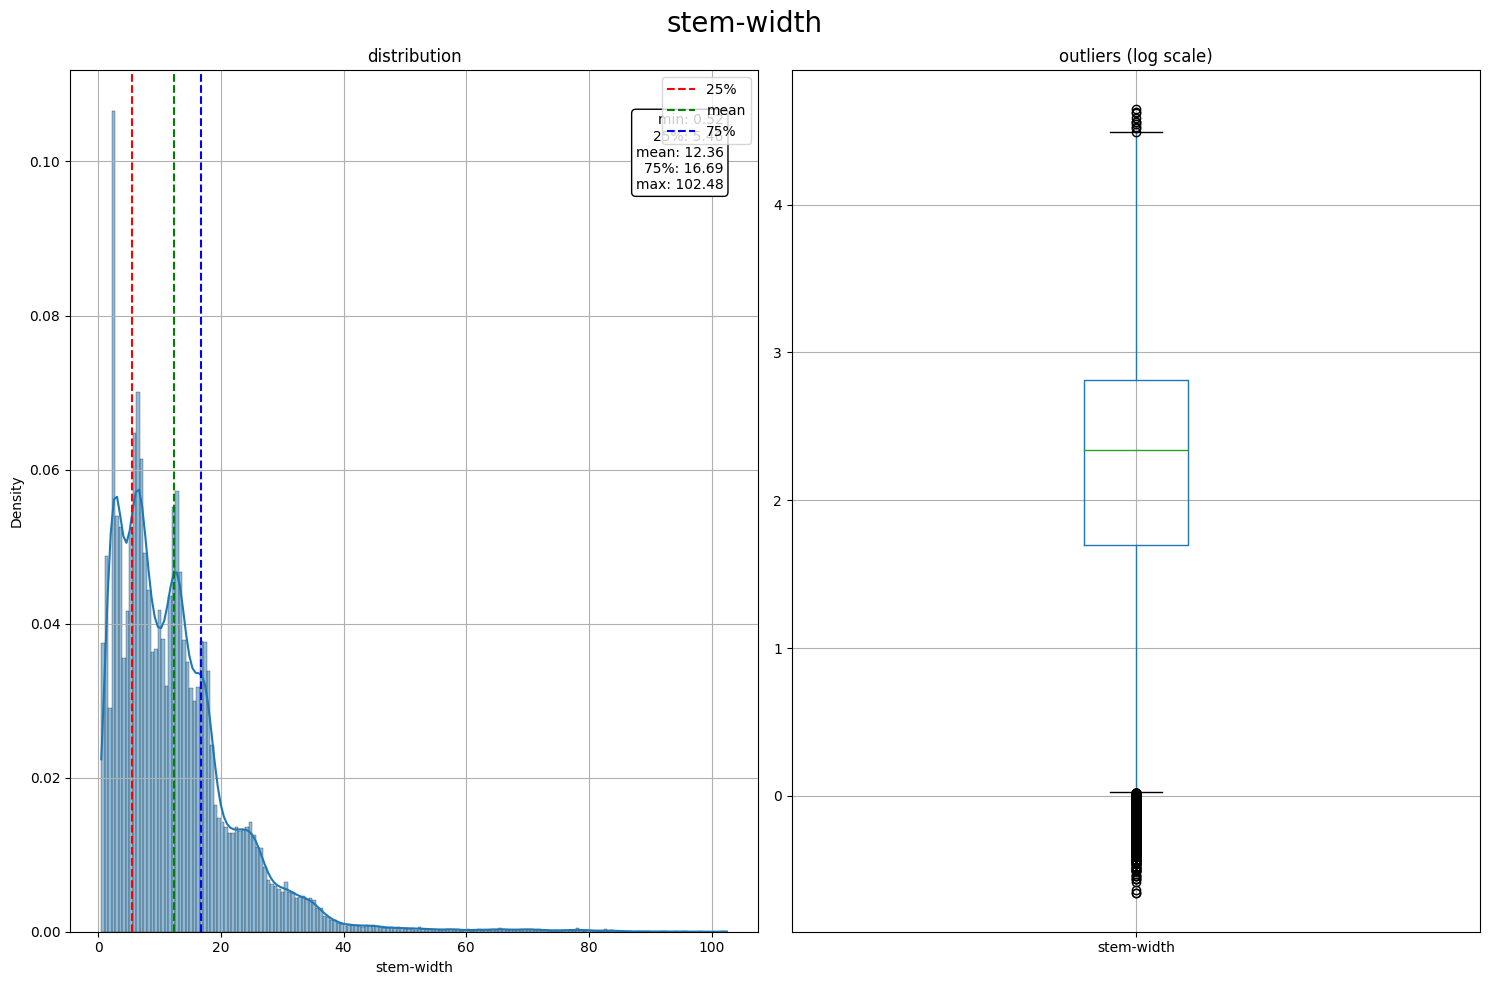

In [ ]:
show_dist('stem-width', dtf) #используем ранее созданную нами функцию для отрисовки графиков

In [ ]:
'''
смотрим какие индексы (по-сути номера объектов в основном датасете) остались в трейне
'''
train_x.index


Index([60500,   932, 28092, 37517, 26695, 23056, 39675, 38371, 25880, 58553,
       ...
       16850,  6265, 54886, 11284, 44732, 54343, 38158,   860, 15795, 56422],
      dtype='int64', length=42748)

In [ ]:
'''
Метод fit(data) используется для вычисления среднего значения и стандартного отклонения для данной функции, которые будут использоваться в дальнейшем для масштабирования.
Метод transform(data) используется для выполнения масштабирования с использованием среднего значения и стандартного отклонения, рассчитанного с использованием метода .fit().
Метод fit_transform() выполняет как подгонку, так и преобразование.
 X_train - это весь экземпляр с атрибутами,
 y_train - это метка каждого экземпляра.
scaled_x_train - фрейм данных с именами объектов,
scaled_x_test.values - значения, без имен объектов
 '''
# X = scaler.fit_transform(test_x)

# test_x_scaled = pd.DataFrame(X, columns=test_x.columns,index=test_x.index )
# test_y_scaled = test_y

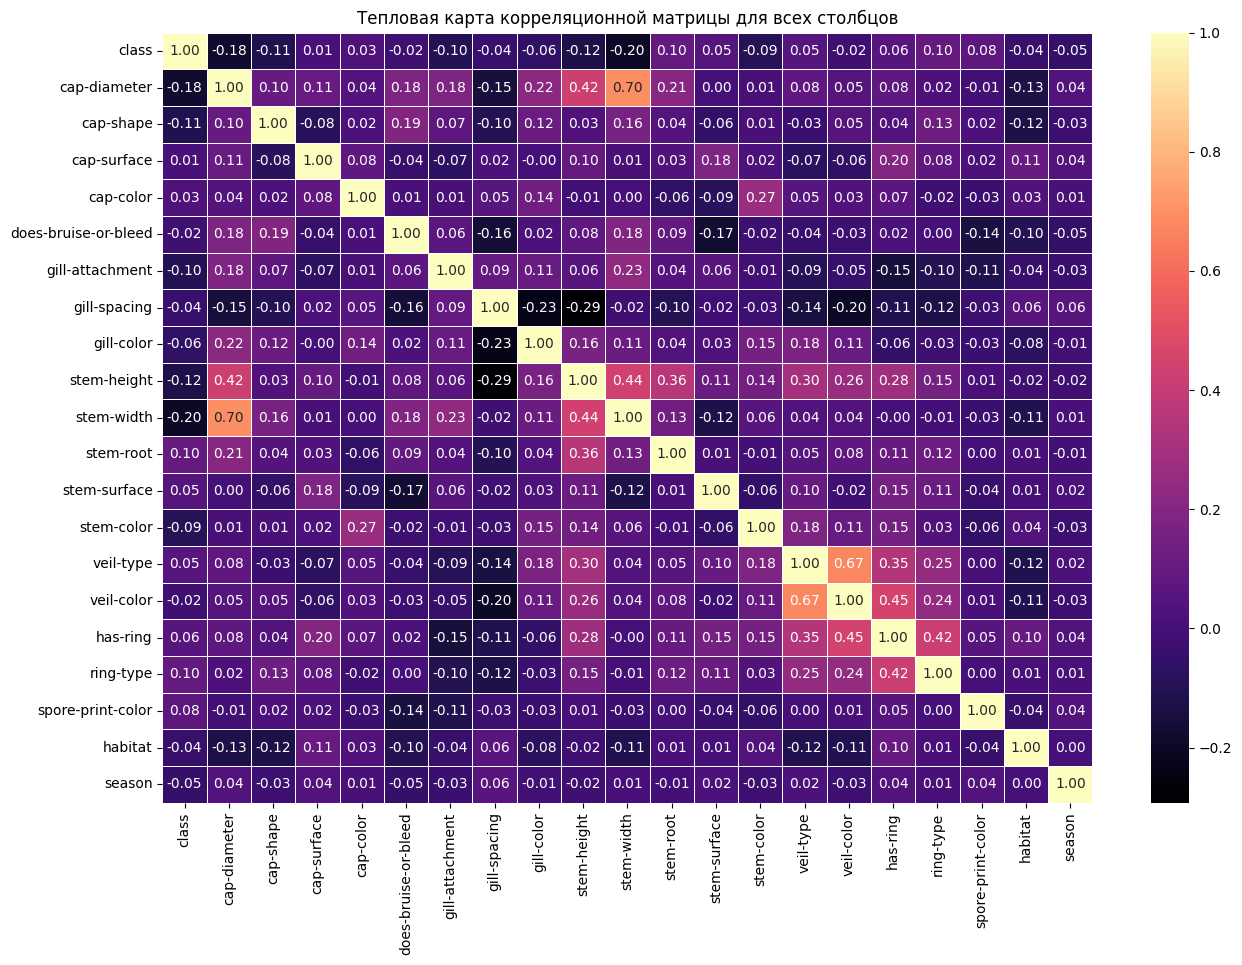

In [ ]:
# Расчет корреляционной матрицы для всех числовых столбцов в датафрейме
corr_matrix = dtf.corr()

# Построение тепловой карты
plt.figure(figsize=(15, 10))  # Увеличение размера графика для лучшей читаемости
sns.heatmap(corr_matrix, annot=True, cmap='magma', fmt=".2f", linewidths=0.5)
plt.title('Тепловая карта корреляционной матрицы для всех столбцов')
plt.show()

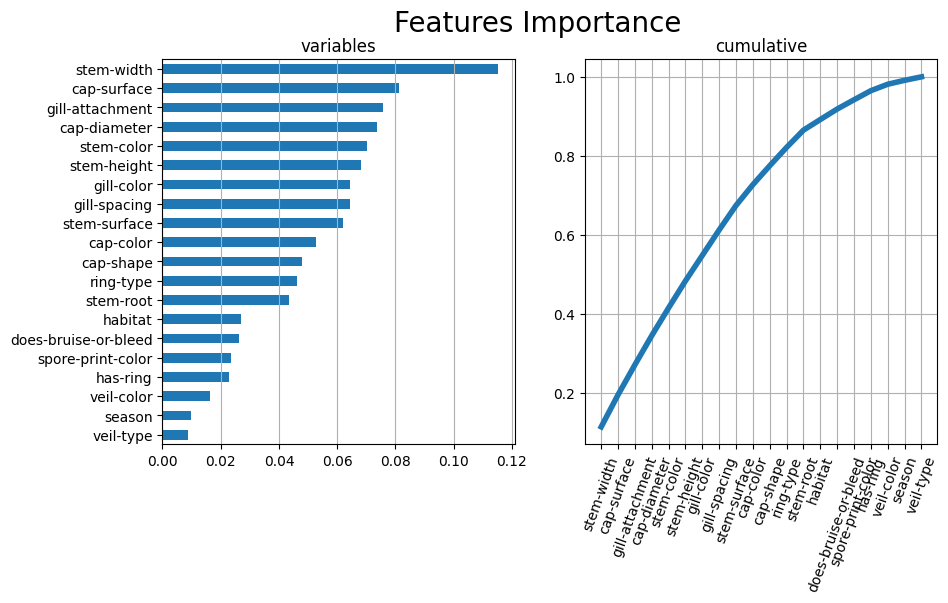

In [ ]:
'''
Оцениваем важность каждой фичи c помощью RandomForestClassifier
'''
X = train_x.values
y = train_y.values
feature_names = train_x.columns.tolist()# имена столбцов в data.
## Importance
model = ensemble.RandomForestClassifier(n_estimators=100,
                                        criterion="entropy", random_state=0)
model.fit(X,y)
importances = model.feature_importances_ #это оценка, присваиваемая функциям модели машинного обучения,которая определяет, насколько «важной» является функция для прогноза модели.
## Put in a pandas dtf
dtf_importances = pd.DataFrame({"IMPORTANCE":importances,
                                "VARIABLE":feature_names}).sort_values("IMPORTANCE",
                                                                       ascending=False)
dtf_importances['cumsum'] = dtf_importances['IMPORTANCE'].cumsum(axis=0)
dtf_importances = dtf_importances.set_index("VARIABLE")


## Plot
'''
 Формируем надписи для графика

 ticks : подобный массиву, содержащий список местоположений xtick. Передача пустого списка удаляет все xticks. (По желанию)
labels : подобный массиву, содержащий метки для размещения в заданных местах тиков. Этот аргумент может быть передан только в том случае, если также переданы тики. (По желанию)
kwargs : текстовые свойства, которые можно использовать для управления внешним видом меток.
Функция Matplotlib xticks() возвращает:
locs: список местоположений xtick.
labels: список текстовых объектов xlabel
plt.grid - Настройка линий сетки.
axis - Ось, к которой применяются изменения.


'''
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False,figsize=(10,5),dpi=100)# распаковываем  кортеж в переменные figи ax.
fig.suptitle("Features Importance", fontsize=20)
ax[0].title.set_text('variables')# подпишем график
dtf_importances[["IMPORTANCE"]].sort_values(by="IMPORTANCE").plot(
    kind="barh", legend=False, ax=ax[0]).grid(axis="x")
ax[0].set(ylabel="")
ax[1].title.set_text('cumulative')# подпишем график
dtf_importances[["cumsum"]].plot(kind="line", linewidth=4,
                                 legend=False, ax=ax[1])
ax[1].set(xlabel="", xticks=np.arange(len(dtf_importances)),
          xticklabels=dtf_importances.index)
plt.xticks(rotation=70)
plt.grid(axis='both')#Настроим линии сетки.
'''
Отрисовываем
'''
plt.show()

In [ ]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42748 entries, 60500 to 56422
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cap-diameter          42748 non-null  float64
 1   cap-shape             42748 non-null  int64  
 2   cap-surface           42748 non-null  int64  
 3   cap-color             42748 non-null  int64  
 4   does-bruise-or-bleed  42748 non-null  int64  
 5   gill-attachment       42748 non-null  int64  
 6   gill-spacing          42748 non-null  int64  
 7   gill-color            42748 non-null  int64  
 8   stem-height           42748 non-null  float64
 9   stem-width            42748 non-null  float64
 10  stem-root             42748 non-null  int64  
 11  stem-surface          42748 non-null  int64  
 12  stem-color            42748 non-null  int64  
 13  veil-type             42748 non-null  int64  
 14  veil-color            42748 non-null  int64  
 15  has-ring            

In [ ]:
train_y.info()

<class 'pandas.core.series.Series'>
Index: 42748 entries, 60500 to 56422
Series name: class
Non-Null Count  Dtype
--------------  -----
42748 non-null  int64
dtypes: int64(1)
memory usage: 667.9 KB


In [ ]:
'''
Проектирование, обучение, тестирование и оценка модели машинного обучения:
'''
X_train = train_x[['cap-diameter', 'cap-shape', 'cap-surface', 'does-bruise-or-bleed']]
y_train = train_y

X_test = test_x[['cap-diameter', 'cap-shape', 'cap-surface', 'does-bruise-or-bleed']]
y_test = test_y

In [ ]:
'''
Будем использовать GradientBoostingClassifier - градиентный бустинг. Он строит предсказание в виде ансамбля слабых предсказывающих моделей, которыми в основном являются деревья решений. Из нескольких слабых моделей в итоге мы собираем одну, но уже эффективную. Общая идея алгоритма – последовательное применение предиктора (предсказателя) таким образом, что каждая последующая модель сводит ошибку предыдущей к минимуму.
 Оценивать качество предсказаний будем по RandomizedSearchCV
'''

## call model
model = ensemble.GradientBoostingClassifier()
## define hyperparameters combinations to try
param_dic = {'learning_rate':[0.15,0.1,0.05],     #весовой коэффициент для поправок по новым деревьям при добавлении в модель
             'n_estimators':[100,250,500],        #количество деревьев, добавленных в модель
             'max_depth':[2,3,4,5],               #максимальная глубина дерева
             'min_samples_split':[2,4,6],         #задает минимальное количество выборок для разделения
             'min_samples_leaf':[1,3,5],          #минимальное количество выборок для формирования листа
             'max_features':[2,3,4],              #квадратный корень из функций обычно является хорошей отправной точкой
             'subsample':[0.7,0.8,0.9,1]}         #образцы, которые будут использоваться для подгонки индивидуального базового файла
## random search(Рандомизированный поиск по гиперпараметрам.)
random_search = model_selection.RandomizedSearchCV(model,
                                                   param_distributions=param_dic, n_iter=10,
                                                   scoring="accuracy").fit(X_train, y_train)
print("Best Model parameters:", random_search.best_params_)
print("Best Model mean accuracy:", random_search.best_score_)
model = random_search.best_estimator_   # здесь теперь хранятся параметры, при которых были получены наилучшие метрики на трейне

Best Model parameters: {'subsample': 0.7, 'n_estimators': 500, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 3, 'max_depth': 5, 'learning_rate': 0.15}
Best Model mean accuracy: 0.8294189956897936


In [ ]:
'''
X_train - это тренировочный датасет
y_train - это целевая переменная для каждого объекта в X_train.
'''
## train
## заполняем модель данным из трайн датасетов
model.fit(X_train, y_train)
## test
predicted_prob = model.predict_proba(X_test) #прогнозирование
'''
Функция Predict() принимает только один аргумент , который представляет собой test датасет.
'''
predicted = model.predict(X_test).astype('int32')

In [ ]:
'''
смотрим, что получили
А получили мы для каждого объекта - вектор вероятностей отнесения этого объекта к классам species
'''
predicted_prob

array([[0.99372998, 0.00627002],
       [0.43154187, 0.56845813],
       [0.16475338, 0.83524662],
       ...,
       [0.46271548, 0.53728452],
       [0.00288558, 0.99711442],
       [0.01944329, 0.98055671]])

In [ ]:
print("Predicted shape:", predicted.shape)
print("Predicted probability shape:", predicted_prob.shape)

Predicted shape: (18321,)
Predicted probability shape: (18321, 2)


In [ ]:
# а это истинное значение, кто к какому классу относится
y_test.astype('int32') #astype -  позволяет преобразовывать тип данных существующего столбца данных в набор данны

,class
11541,1
35700,2
55781,1
29303,2
46601,1
...,...
44375,2
11,2
23571,2
38837,2


In [ ]:
type(y_test)

<class 'pandas.core.series.Series'>


In [ ]:
y_test_1d = y_test.values

In [ ]:
# Вычисление AUC для бинарной классификации
auc = metrics.roc_auc_score(y_test_1d, predicted_prob[:, 1])

# Выводим метрики
print("Accuracy (overall correct predictions):", round(accuracy, 2))
print("AUC:", round(auc, 2))

# Precision e Recall
recall = metrics.recall_score(y_test_1d, predicted, average="weighted")
precision = metrics.precision_score(y_test_1d, predicted, average="weighted")
print("Recall (all 1s predicted right):", round(recall, 2))
print("Precision (confidence when predicting a 1):", round(precision, 2))
print("Detail:")
print(metrics.classification_report(y_test_1d, predicted,
                                    target_names=[str(i) for i in np.unique(y_test_1d)]))


Accuracy (overall correct predictions): 0.83
AUC: 0.93
Recall (all 1s predicted right): 0.83
Precision (confidence when predicting a 1): 0.83
Detail:
              precision    recall  f1-score   support

           1       0.80      0.82      0.81      8108
           2       0.86      0.84      0.85     10213

    accuracy                           0.83     18321
   macro avg       0.83      0.83      0.83     18321
weighted avg       0.83      0.83      0.83     18321



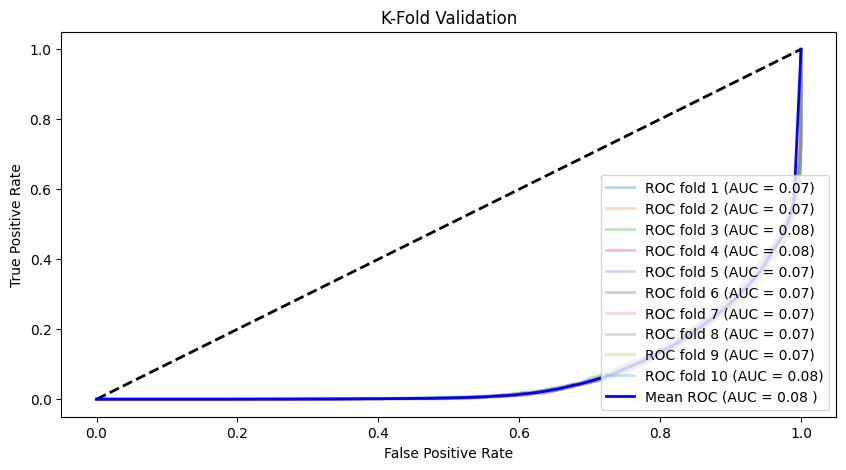

In [ ]:
'''
Строим ROC кривые
'''
cv = model_selection.StratifiedKFold(n_splits=10, shuffle=True)
tprs, aucs = [], []
mean_fpr = np.linspace(0,1,100)
fig = plt.figure(figsize=(10,5),dpi=100)
i = 1
for train, test in cv.split(X_train, y_train):
    '''
iloc - позволяет получить определенное значение, принадлежащее к строке и столбцу,
используя указанные значения индекса
X_train - это весь экземпляр с атрибутами,
y_train - это метка каждого экземпляра.
train_selected_test - Разделяет массивы / матрицы на случайные тестовые подмножества.

'''
    X_train_selected = X_train.iloc[train]

    y_train_selected = y_train.iloc[train]
    X_train_selected_test = X_train.iloc[test]
    y_train_selected_test = y_train.iloc[test]

    prediction = model.fit(X_train_selected, y_train_selected).predict_proba(X_train_selected_test)
    fpr, tpr, t = metrics.roc_curve(y_train_selected_test, prediction[:, 1], pos_label=1)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i = i+1
'''
Получим результат
'''
plt.plot([0,1], [0,1], linestyle='--', lw=2, color='black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = metrics.auc(mean_fpr, mean_tpr)
'''
построим график

'''
plt.plot(mean_fpr, mean_tpr, color='blue', label=r'Mean ROC (AUC = %0.2f )' % (mean_auc), lw=2, alpha=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('K-Fold Validation')
plt.legend(loc="lower right")

plt.show()

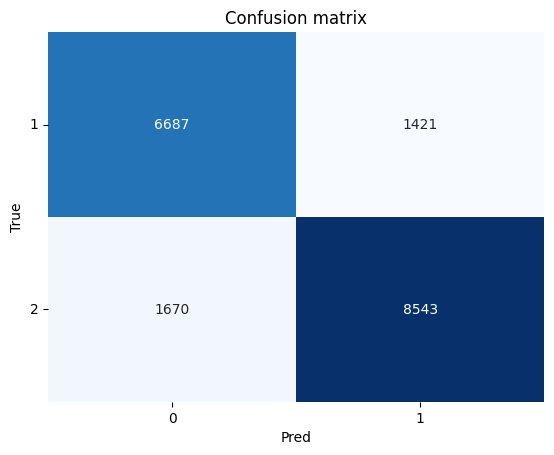

In [ ]:
'''
Confusion matrix (Мультиклассовый)
'''

classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, predicted, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
'''
построим график

'''

plt.show()

In [ ]:
'''
Вспомогательная функция для построения confusion matrix для каждого класса
'''
def compute_class(ls_res, class_value): # возвращаем строку имен классов
    y_t_class = ls_res.copy().astype(int)
    y_t_class = y_t_class.apply(lambda c: 1 if c  == class_value  else 0)
    return  y_t_class

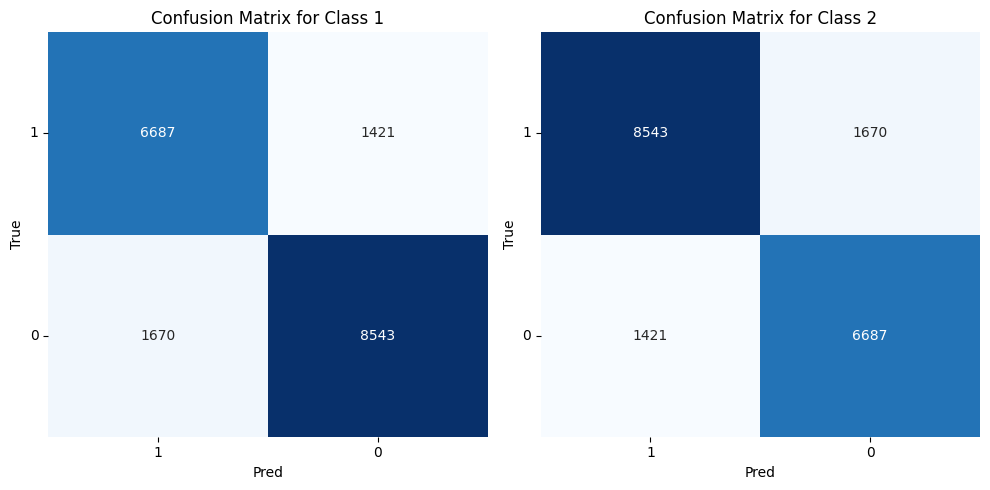

In [ ]:
# Уникальные классы
classes = np.unique(y_test).astype(int)
lbs = [1, 0]

# Проверка на наличие только двух классов
assert len(classes) == 2, "В классе должно быть только два класса."

# Создаем подграфики
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), dpi=100)

for idx, class_i in enumerate(classes):
    y_one_class = compute_class(y_test, class_i)
    predicted_one_class = compute_class(pd.Series(predicted.tolist()), class_i)

    cm = metrics.confusion_matrix(y_one_class, predicted_one_class, labels=lbs)

    # Отображение матрицы ошибок
    sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False, ax=ax[idx])
    ax[idx].set(xlabel="Pred", ylabel="True", title=f"Confusion Matrix for Class {class_i}")
    ax[idx].set_xticklabels(labels=lbs, rotation=0)
    ax[idx].set_yticklabels(labels=lbs, rotation=0)

# Построим график
plt.tight_layout()  # Подгоняем подграфики
plt.show()

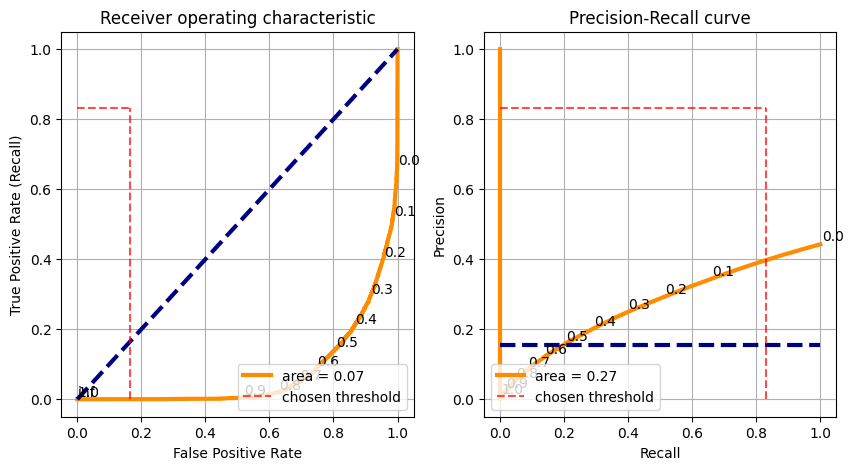

In [ ]:
'''
Еще ROC кривые
'''

classes = np.unique(y_test)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(10,5),dpi=100)
'''

## plot ROC curve
построим кривую ROC

'''
fpr, tpr, thresholds = metrics.roc_curve(y_test, predicted_prob[:, 1], pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
ax[0].plot(fpr, tpr, color='darkorange', lw=3, label='area = %0.2f' % roc_auc)
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].hlines(y=recall, xmin=0, xmax=1-cm[0,0]/(cm[0,0]+cm[0,1]), color='red', linestyle='--', alpha=0.7, label="chosen threshold")
ax[0].vlines(x=1-cm[0,0]/(cm[0,0]+cm[0,1]), ymin=0, ymax=recall, color='red', linestyle='--', alpha=0.7)
ax[0].set(xlabel='False Positive Rate', ylabel="True Positive Rate (Recall)", title="Receiver operating characteristic")
ax[0].legend(loc="lower right")
ax[0].grid(True)
## annotate ROC thresholds
'''
найдем пороговые значения ROC
'''

thres_in_plot = []
for i,t in enumerate(thresholds):
    t = np.round(t,1)
    if t not in thres_in_plot:
        ax[0].annotate(t, xy=(fpr[i],tpr[i]), xytext=(fpr[i],tpr[i]),
                    textcoords='offset points', ha='left', va='bottom')
        thres_in_plot.append(t)
    else:
        next
## plot P-R curve
'''
плстроим привую P-R
'''

precisions, recalls, thresholds = metrics.precision_recall_curve(y_test, predicted_prob[:,1], pos_label=1)
roc_auc = metrics.auc(recalls, precisions)
ax[1].plot(recalls, precisions, color='darkorange', lw=3, label='area = %0.2f' % roc_auc)
ax[1].plot([0,1], [(cm[1,0]+cm[1,0])/len(y_test), (cm[1,0]+cm[1,0])/len(y_test)], linestyle='--', color='navy', lw=3)
ax[1].hlines(y=precision, xmin=0, xmax=recall, color='red', linestyle='--', alpha=0.7, label="chosen threshold")
ax[1].vlines(x=recall, ymin=0, ymax=precision, color='red', linestyle='--', alpha=0.7)
ax[1].set(xlabel='Recall', ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="lower left")
ax[1].grid(True)
## annotate P-R thresholds
'''
пороговые значения P-R
'''
thres_in_plot = []
for i,t in enumerate(thresholds):
    t = np.round(t,1)
    if t not in thres_in_plot:
        ax[1].annotate(np.round(t,1), xy=(recalls[i],precisions[i]),
                    xytext=(recalls[i],precisions[i]),
                    textcoords='offset points', ha='left', va='bottom')
        thres_in_plot.append(t)
    else:
        next
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.p

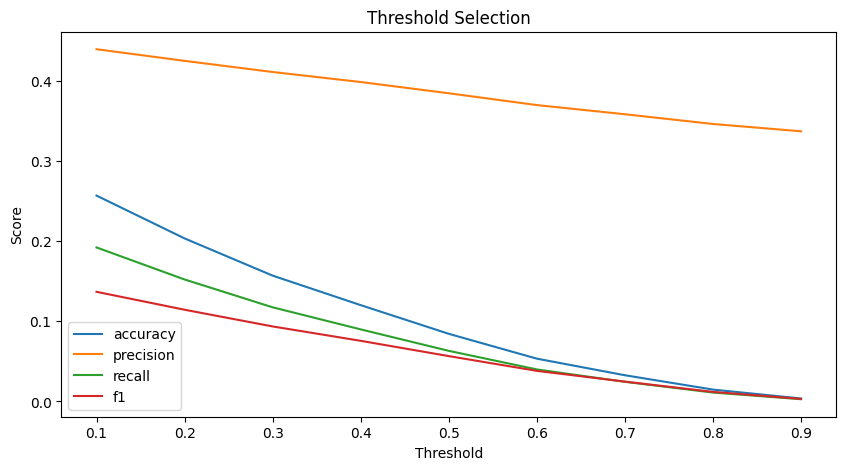

In [ ]:
## calculate scores for different thresholds
'''
Определим, какие значения отсечки лучше всего для нашей модели.
Для этого построим график ("значение отсечки", "значение метрики") для каждой метрики accuracy, precision, recall, f1
'''
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(10,5),dpi=100)

dic_scores = {'accuracy':[], 'precision':[], 'recall':[], 'f1':[]}
XX_train, XX_test, yy_train, yy_test = model_selection.train_test_split(X_train, y_train, test_size=0.2)
predicted_prob = model.fit(XX_train, yy_train).predict_proba(XX_test)[:,1]
thresholds = []
for threshold in np.arange(0.1, 1, step=0.1):
    predicted = (predicted_prob > threshold)
    thresholds.append(threshold)
    dic_scores["accuracy"].append(metrics.accuracy_score(yy_test, predicted))
    dic_scores["precision"].append(metrics.precision_score(yy_test, predicted, average='macro', zero_division=1))
    dic_scores["recall"].append(metrics.recall_score(yy_test, predicted, average='macro'))
    dic_scores["f1"].append(metrics.f1_score(yy_test, predicted, average='macro'))
'''
Добавим линии
'''
## plot
dtf_scores = pd.DataFrame(dic_scores).set_index(pd.Index(thresholds))
ax.set(xlabel='Threshold', ylabel="Score", title="Threshold Selection")
dtf_scores.plot(ax=ax)
'''
отрисовываем
'''

plt.show()

1. Взаимосвязь метрик:

Все метрики (accuracy, precision, recall, F1-score) демонстрируют отрицательную корреляцию с увеличением порога.

При повышении порога модель становится более строгой, что приводит к снижению общего количества положительных предсказаний.

2. Точность против полноты:

Увеличение порога приводит к снижению как точности, так и полноты, указывая на необходимость выбора оптимального баланса между этими метриками в зависимости от контекста задачи.


